In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import shapefile as shp
import geopandas as gpd
from shapely.geometry import Point
from scipy import spatial

In [111]:

poblacio = gpd.read_file("dades/Poblacio/gridpoblacio01012022.shp")
traffic_bcn = gpd.read_file("dades/OpenTransportMap/Barcelona/roadlinks_ES511.shp") #Trafficvol
traffic_gir = gpd.read_file("dades/OpenTransportMap/Girona/roadlinks_ES512.shp")#Trafficvol
traffic_llei = gpd.read_file("dades/OpenTransportMap/Lleida/roadlinks_ES513.shp")#Trafficvol
traffic_tarr = gpd.read_file("dades/OpenTransportMap/Tarragona/roadlinks_ES514.shp")#Trafficvol
int_mit_veh = gpd.read_file("dades/road_transport_interurban_CAT.geojson") #Good to have


In [ ]:
#modfile = file4.shapeRecord()
#print(modfile.shape.__geo_interface__)

dfjson = pd.DataFrame(data=int_mit_veh)



In [ ]:
df_AMS_sconcno2 = pd.read_csv('dades/AMS_Observacions/XVPCA_info_sconcno2_2023.csv') #lat lon of stations. Also if they are suburban/rural/urban-center
gdf = gpd.GeoDataFrame(traffic_bcn)

def get_min_dist(df, gdf): # -> Input> Dataframe with .csv with station location, gdf with lines which are the start / end of the road in lat,lon. Output is an array of the closest distance between a station and the road
    
    AMS_np = df.to_numpy()
    AMS_np_lat = AMS_np[:,1]
    AMS_np_lon = AMS_np[:,2]
    lis = []
    lis_points = []

    AMS_fused = np.vstack((AMS_np_lon, AMS_np_lat)).T

    for element in AMS_fused:
        p = Point(element[0], element[1])
        lis_points.append([p])
    for point_coords in lis_points:
        point = Point(point_coords[0])
        elem = gdf['geometry'].distance(point)
        lis.append(elem.min())
    return(lis)

print (get_min_dist(df_AMS_sconcno2, gdf))


In [ ]:
df = pd.DataFrame(data=poblacio)
print(df.axes)
print(df['P_0_14']) #Percentatge poblacio de 0 a 14
print(df['P_15_64'])# -- 15 a 64
print(df['P_65_I_MES'])  # -- mes de 65
print(df['TOTAL']) #Total
poblacio.plot()

In [ ]:

df_int = pd.DataFrame(data=int_mit_veh)
print(df_int['imd_tot'])
int_mit_veh.plot()

df_traff_bcn = pd.DataFrame(data=traffic_bcn)
#traffic_bcn.plot()
#traffic_gir.plot()
#traffic_llei.plot() //trafficvol 
#traffic_tarr.plot()

<Axes: xlabel='lon', ylabel='lat'>

<Figure size 640x480 with 0 Axes>

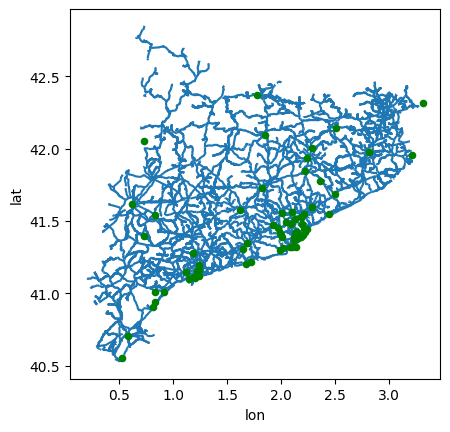

In [208]:
fig = plt.figure()
ax = int_mit_veh.plot()
df_AMS_sconcno2.plot.scatter(x='lon',y='lat',ax=ax,color='g', zorder=2)
